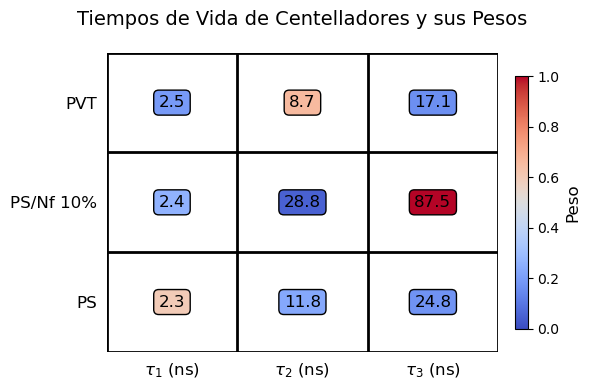

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Datos: tiempos de vida (en ns) y sus respectivos pesos para tres centelladores
data = {
    'Centellador': ['PS', 'PS', 'PS',
                    'PS/Nf 10%', 'PS/Nf 10%', 'PS/Nf 10%',
                    'PVT', 'PVT', 'PVT'],
    'Tiempo de Vida (ns)': [2.26, 11.81, 24.76,2.43, 28.75, 87.47, 2.47, 8.7, 17.06],  # Tiempos de vida para cada centellador
    'Peso': [0.6, 0.23, 0.17, 0.26, 0.05, 68.8, 0.19, 0.66, 0.16],    # Pesos correspondientes
}

# Crear DataFrame
df = pd.DataFrame(data)

# Añadir una columna de conteo para crear columnas de T1, T2, T3
df['Conteo'] = df.groupby('Centellador').cumcount() + 1

# Crear una tabla pivote para los tiempos de vida y pesos
df_pivot = df.pivot(index='Centellador', columns='Conteo', values=['Tiempo de Vida (ns)', 'Peso'])

# Crear figura con aspecto más compacto
fig, ax = plt.subplots(figsize=(6, 4))

# Definir el rango de colores según los pesos
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.cm.coolwarm

# Dibujar la tabla manualmente, ajustando los tamaños de celda para que se vean más ordenadas
for i in range(df_pivot['Peso'].shape[0]):
    for j in range(df_pivot['Peso'].shape[1]):
        peso = df_pivot['Peso'].iloc[i, j]
        tiempo = df_pivot['Tiempo de Vida (ns)'].iloc[i, j]
        
        # Color de la celda según el peso
        color = cmap(norm(peso))
        # Anotar el tiempo de vida en cada celda con ajuste de tamaño y alineación
        ax.text(j + 0.5, i + 0.5, f'{tiempo:.1f}', va='center', ha='center', 
                fontsize=12, bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

# Añadir líneas de separación entre las celdas
for i in range(4):  # Líneas horizontales
    ax.axhline(i, color='black', linewidth=2)

for j in range(4):  # Líneas verticales
    ax.axvline(j, color='black', linewidth=2)

# Ajustar los ejes para que las celdas estén más compactas y ordenadas
ax.set_xlim(0, 3)
ax.set_ylim(0, 3)

# Personalizar el gráfico para parecer más a una tabla
ax.set_xticks(np.arange(3) + 0.5)
ax.set_xticklabels([r'$\tau_1$ (ns)', r'$\tau_2$ (ns)', r'$\tau_3$ (ns)'], fontsize=12)
ax.set_yticks(np.arange(3) + 0.5)
ax.set_yticklabels(df_pivot.index, fontsize=12)

# Ocultar los ejes y el marco para que parezca más una tabla
ax.set_xticks(np.arange(3) + 0.5)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)

# Agregar la barra de colores que referencia los pesos
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # No se necesita para heatmaps
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Peso', fontsize=12)

# Título
plt.title('Tiempos de Vida de Centelladores y sus Pesos', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


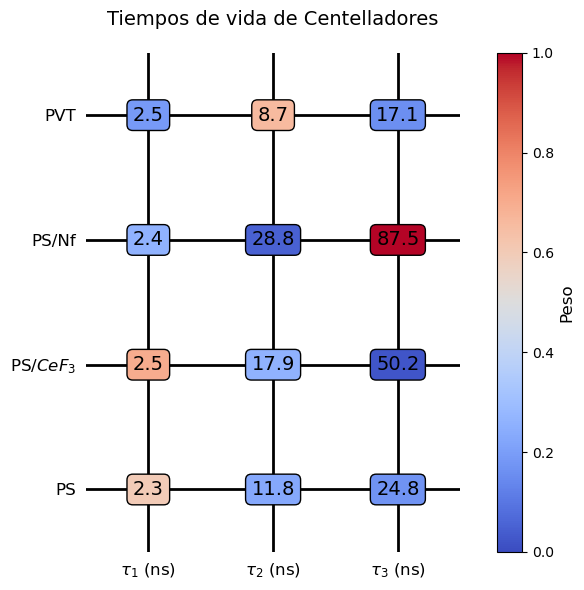

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import numpy as np

# Datos: tiempos de vida (en ns) y sus respectivos pesos para cuatro centelladores
a=0.1
data = {
    'Centellador': ['PS', 'PS', 'PS',
                    'PS/Nf', 'PS/Nf', 'PS/Nf',
                    'PVT', 'PVT', 'PVT',
                    r'PS/$CeF_{3}$', r'PS/$CeF_{3}$', r'PS/$CeF_{3}$'],
    'Tiempo de Vida (ns)': [2.26, 11.81, 24.76,2.43, 28.75, 87.47, 2.47, 8.7, 17.06,2.51,17.91,50.17],  # Tiempos de vida para cada centellador
    'Peso': [0.6, 0.23, 0.17, 0.26, 0.05, 68.8, 0.19, 0.66, 0.16,0.7,0.26,0.02],     # Pesos correspondientes
}

# Crear DataFrame
df = pd.DataFrame(data)

# Añadir una columna de conteo para crear columnas de T1, T2, T3
df['Conteo'] = df.groupby('Centellador').cumcount() + 1

# Crear una tabla pivote para los tiempos de vida y pesos
df_pivot = df.pivot(index='Centellador', columns='Conteo', values=['Tiempo de Vida (ns)', 'Peso'])

# Crear figura con aspecto más compacto
fig, ax = plt.subplots(figsize=(10, 6))  # Ajusta el tamaño de la figura si es necesario

# Definir el rango de colores según los pesos
norm = mcolors.Normalize(vmin=0, vmax=1)
cmap = plt.cm.coolwarm

# Dibujar la tabla manualmente, ajustando los tamaños de celda para que se vean más ordenadas
for i in range(df_pivot['Peso'].shape[0]):
    for j in range(df_pivot['Peso'].shape[1]):
        peso = df_pivot['Peso'].iloc[i, j]
        tiempo = df_pivot['Tiempo de Vida (ns)'].iloc[i, j]
        
        # Color de la celda según el peso
        color = cmap(norm(peso))
        # Anotar el tiempo de vida en cada celda con ajuste de tamaño y alineación
        ax.text(j + 0.5, i + 0.5, f'{tiempo:.1f}', va='center', ha='center', 
                fontsize=14, bbox=dict(facecolor=color, edgecolor='black', boxstyle='round,pad=0.3'))

# Añadir líneas de separación entre las celdas
for i in range(df_pivot['Peso'].shape[0] + 1):  # Líneas horizontales
    ax.axhline(i - 0.5, color='black', linewidth=2)

for j in range(df_pivot['Peso'].shape[1] + 1):  # Líneas verticales
    ax.axvline(j - 0.5, color='black', linewidth=2)

# Ajustar los ejes para que las celdas estén más compactas y ordenadas
ax.set_xlim(0, df_pivot['Peso'].shape[1])
ax.set_ylim(0, df_pivot['Peso'].shape[0])

# Personalizar el gráfico para parecer más a una tabla
ax.set_xticks(np.arange(df_pivot['Peso'].shape[1]) + 0.5)
ax.set_xticklabels([fr'$\tau_{i+1}$ (ns)' for i in range(df_pivot['Peso'].shape[1])], fontsize=12)   #r'$\tau_1$ (ns)', r'$\tau_2$ (ns)', r'$\tau_3$ (ns)'
ax.set_yticks(np.arange(df_pivot['Peso'].shape[0]) + 0.5)
ax.set_yticklabels(df_pivot.index, fontsize=12)

# Ajustar el espacio entre celdas
ax.set_aspect('equal', 'box')

# Ocultar los ejes y el marco para que parezca más una tabla
ax.set_xticks(np.arange(df_pivot['Peso'].shape[1]) + 0.5)
ax.xaxis.set_ticks_position('none') 
ax.yaxis.set_ticks_position('none')
ax.set_frame_on(False)

# Agregar la barra de colores que referencia los pesos
sm = plt.cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])  # No se necesita para heatmaps
cbar = plt.colorbar(sm, ax=ax, fraction=0.03, pad=0.04)
cbar.set_label('Peso', fontsize=12)

# Título
plt.title('Tiempos de vida de Centelladores', fontsize=14, pad=20)

plt.tight_layout()
plt.show()


In [1]:
import pandas as pd

# Datos
data = {
    'Centellador': ['PS', 'PS', 'PS',
                    'PS/Nf', 'PS/Nf', 'PS/Nf',
                    'PVT', 'PVT', 'PVT',
                    r'PS/$CeF_{3}$', r'PS/$CeF_{3}$', r'PS/$CeF_{3}$'],
    'Tiempo de Vida (ns)': [2.26, 11.81, 24.76, 2.43, 28.75, 87.47, 2.47, 8.7, 17.06, 2.51, 17.91, 50.17],
    'Peso': [0.6, 0.23, 0.17, 0.26, 0.05, 0.68, 0.19, 0.66, 0.16, 0.7, 0.26, 0.02],
}

# Convertir pesos a porcentajes
data['Peso (%)'] = [round(peso * 100, 2) for peso in data['Peso']]

# Crear un DataFrame
df = pd.DataFrame(data)

# Agrupar por centellador y formatear los resultados
tabla_resumen = df.groupby('Centellador').apply(
    lambda group: ', '.join(
        [f"{tau} ({peso}%)" for tau, peso in zip(group['Tiempo de Vida (ns)'], group['Peso (%)'])]
    )
).reset_index()

# Renombrar columnas
tabla_resumen.columns = ['Centellador', 'Tiempos de Vida (ns) con Pesos']

# Mostrar tabla
print(tabla_resumen)


    Centellador               Tiempos de Vida (ns) con Pesos
0            PS   2.26 (60.0%), 11.81 (23.0%), 24.76 (17.0%)
1  PS/$CeF_{3}$    2.51 (70.0%), 17.91 (26.0%), 50.17 (2.0%)
2         PS/Nf  2.43 (26.0%), 28.75 (5.0%), 87.47 (6880.0%)
3           PVT     2.47 (19.0%), 8.7 (66.0%), 17.06 (16.0%)
